<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 8: Bayesian statistics

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 8.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- fill in information

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 8.1 Coin Toss Example

Let's calculate some probability distributions for the weighting on a coin after tossing it a bunch of times.

In the case where we assume a uniform prior for $p$, the probability of tossing heads, we get the following for our posterior:
\begin{equation} P(p\mid D) \propto P(p)\cdot P(D\mid p) = \frac{N!}{m!(N-m)!}(1-p)^{N-m}p^m \end{equation}
where we've tossed the coin $N$ times and gotten heads $m$ times.

Let's define a function to calculate this for different values of $N$ and $m$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.signal import peak_widths

def with_uniform_prior(p,N,m):
    return comb(N,m)*np.power(p,m)*np.power(1-p,N-m)

<!--start-block-->
### >>>EXERCISE

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


What does this look like for $N=20$ and $m=15$?


<br>
<!--end-block-->



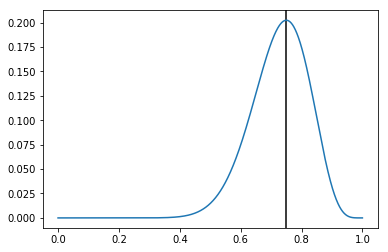

Best p:  0.75


In [14]:
N = 20
m = 15
p = np.linspace(0,1,1000)
posterior = with_uniform_prior(p,N,m)     # calculating P(p|D)
plt.axvline(0.75,c='k')              # plotting the p=0.75 line
plt.plot(p,posterior)
plt.show()

best_p = p[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
print('Best p: ', round(best_p,3))

<!--start-block-->
### >>>EXERCISE

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


What if we tossed the coin 100 times and kept the proportion of heads the same? So $N=100$ and $m=75$?


<br>
<!--end-block-->



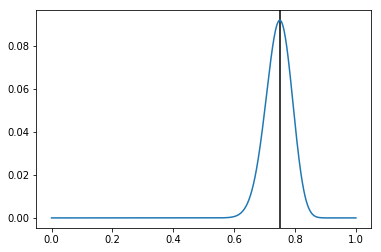

Best p:  0.75


In [15]:
N = 100
m = 75
posterior = with_uniform_prior(p,N,m)     # calculating P(p|D)
plt.axvline(0.75,c='k')              # plotting the p=0.75 line
plt.plot(p,posterior)
plt.show()

best_p = p[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
print('Best p: ', round(best_p,3))    

<!--start-block-->
### >>>EXERCISE

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


And if we had tossed it way fewer times? $N=4$ and $m=3$.


<br>
<!--end-block-->

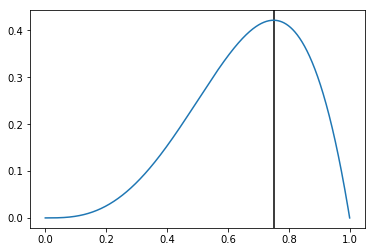

Best p:  0.75


In [16]:
N = 4
m = 3
posterior = with_uniform_prior(p,N,m)     # calculating P(p|D)
plt.axvline(0.75,c='k')              # plotting the p=0.75 line
plt.plot(p,posterior)
plt.show()

best_p = p[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
print('Best p: ', round(best_p,3)) 

### Conclusion


So you can see that the number of data points influences the width of $P(p|D)$, giving us a straightforward way of calculating an uncertainty on the value of $p$ -- which stays the same in all cases. Bayesian statistics gives us a clear recipe to analyze all three of these situations.

<br>

<!--start-block-->
<hr style="height: 1px;">

## 3.2 Another prior
Let's assume that unfair coins are super rare, and define a different prior for this case. With 99% probability, the coin is nearly perfectly weighted. We'll model this as a Gaussian with mean 0.5 and $\sigma=0.01$. With 1% chance, it is an unfair coin -- in this case we have no idea what $p$ is so we'll use a uniform distribution.
\begin{equation} P(p) = 0.99\cdot \frac{1}{0.01\sqrt{2\pi}}\exp\left(-\frac{1}{2}\cdot\frac{(p-0.5)^2}{\sigma^2}\right)+0.01\cdot1 \end{equation}

In [18]:
def with_new_prior(p,N,m):
    prior = 0.99 / (0.01 * np.sqrt(2*np.pi)) * np.exp(-(p-0.5)**2/(2*0.01**2))+0.01
    return prior*with_uniform_prior(p,N,m)

<!--start-block-->
### >>>EXERCISE

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


As above, what does this look like for 𝑁=20 and 𝑚=15?


<br>
<!--end-block-->

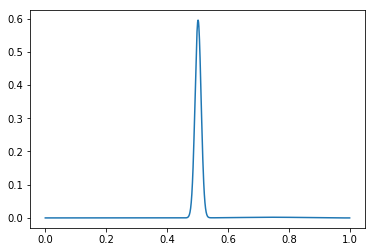

Best p:  0.502


In [19]:
N = 20
m = 15
posterior = with_new_prior(p,N,m)     # calculating P(p|D)
plt.plot(p,posterior)
plt.show()

best_p = p[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
print('Best p: ', round(best_p,3)) 

<!--start-block-->
### >>>EXERCISE

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


This prior really changes the results! In the $N=20$ and $m=15$ cases, this looks a lot like a fair coin. What if we add more events? Try 𝑁=80 and 𝑚=60?


<br>
<!--end-block-->

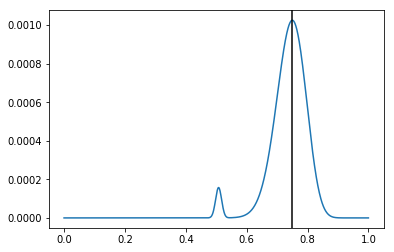

Best p:  0.75


In [20]:
N = 80
m = 60
posterior = with_new_prior(p,N,m)     # calculating P(p|D)
plt.plot(p,posterior)
best_p = p[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
plt.axvline(best_p,c='k')
plt.show()

print('Best p: ', round(best_p,3)) 

<!--start-block-->
### >>>EXERCISE

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


Try 𝑁=200 and 𝑚=150?


<br>
<!--end-block-->

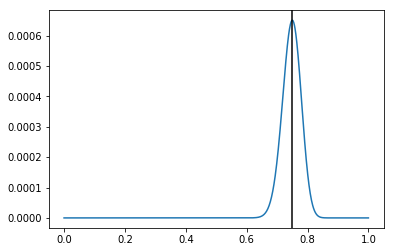

Best p:  0.75


In [21]:
N = 200
m = 150
posterior = with_new_prior(p,N,m)     # calculating P(p|D)
plt.plot(p,posterior)
best_p = p[np.argmax(posterior)]     # getting the value of p where P(p|D) is maximized
plt.axvline(best_p,c='k')
plt.show()

print('Best p: ', round(best_p,3)) 

### Conclusion

So you can see a clear dependance on the choice of prior!